In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report
)

In [14]:
# Titanic Dataset
url = "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Parte 1

In [16]:
# 1.1. Elimine as variáveis “PassengerId”, “Name”, “Ticket” e “Cabin”
cols_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns=cols_drop, errors="ignore")

# 1.2. Elimine observações que contenham dados ausentes (NA)
df = df.dropna().copy()

# 1.3. Aplique o LabelEncoder nas variáveis “Embarked” e “Sex”
le_embarked = LabelEncoder()
le_sex = LabelEncoder()
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])
df["Sex"] = le_sex.fit_transform(df["Sex"])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
# 1.4. Separe o dataframe resultante em Treino-Teste, utilizando a proporção 80-20%
target = "Survived"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((569, 7), (143, 7))

In [18]:
# Parte 2

In [19]:
tree_default = DecisionTreeClassifier(random_state=42)
tree_default.fit(X_train, y_train)

# Visualização da árvore de decisão
y_pred = tree_default.predict(X_test)

# 2.1. Apresente a matriz de confusão com o resultado da aplicação do modelo no conjunto de testes
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
cm  # [[TN, FP],[FN, TP]]

array([[60, 25],
       [20, 38]])

In [20]:
# 2.2. Apresente os valores encontrados para as medidas TN, TP, FN e FP
TN, FP, FN, TP = cm.ravel()
TN, TP, FN, FP

(np.int64(60), np.int64(38), np.int64(20), np.int64(25))

In [21]:
# 2.3. Apresente a acurácia de seu modelo
acc = accuracy_score(y_test, y_pred)
acc

0.6853146853146853

In [22]:
# 2.4. Apresente as métricas precision, recall e F1-score do seu modelo
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

prec, rec, f1

(0.6031746031746031, 0.6551724137931034, 0.628099173553719)

In [23]:
# Parte 3

In [24]:
depths = [3, 6]

results = []
models = {}

for d in depths:
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    p = m.predict(X_test)
    a = accuracy_score(y_test, p)
    pr = precision_score(y_test, p, zero_division=0)
    rc = recall_score(y_test, p, zero_division=0)
    f = f1_score(y_test, p, zero_division=0)
    results.append({"max_depth": d, "accuracy": a, "precision": pr, "recall": rc, "f1": f})
    models[d] = m

pd.DataFrame(results).sort_values("f1", ascending=False)

,max_depth,accuracy,precision,recall,f1
0,3,0.825175,0.823529,0.724138,0.770642
1,6,0.811189,0.816327,0.689655,0.747664


In [25]:
best = max(results, key=lambda r: r["f1"])
best

{'max_depth': 3,
 'accuracy': 0.8251748251748252,
 'precision': 0.8235294117647058,
 'recall': 0.7241379310344828,
 'f1': 0.7706422018348624}

In [26]:
# Parte 4

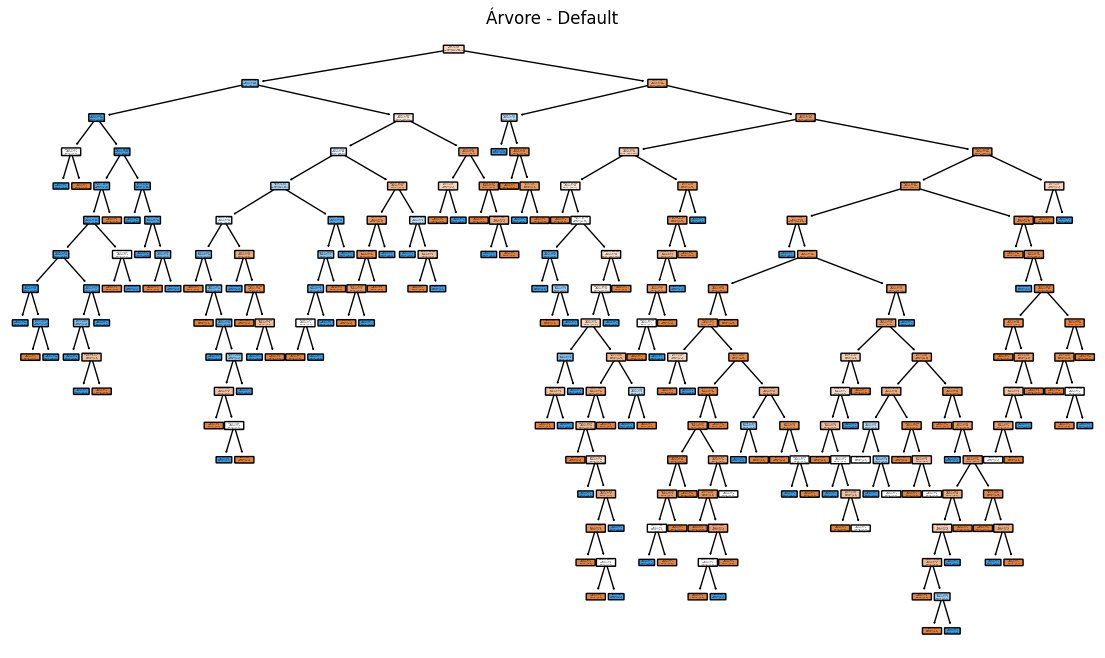

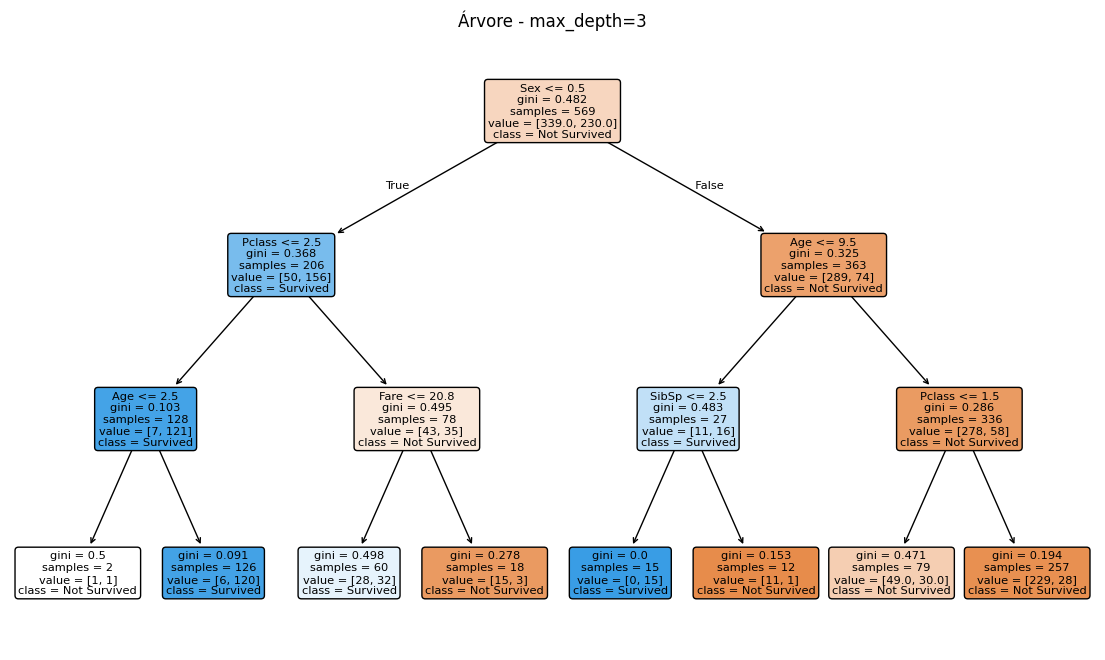

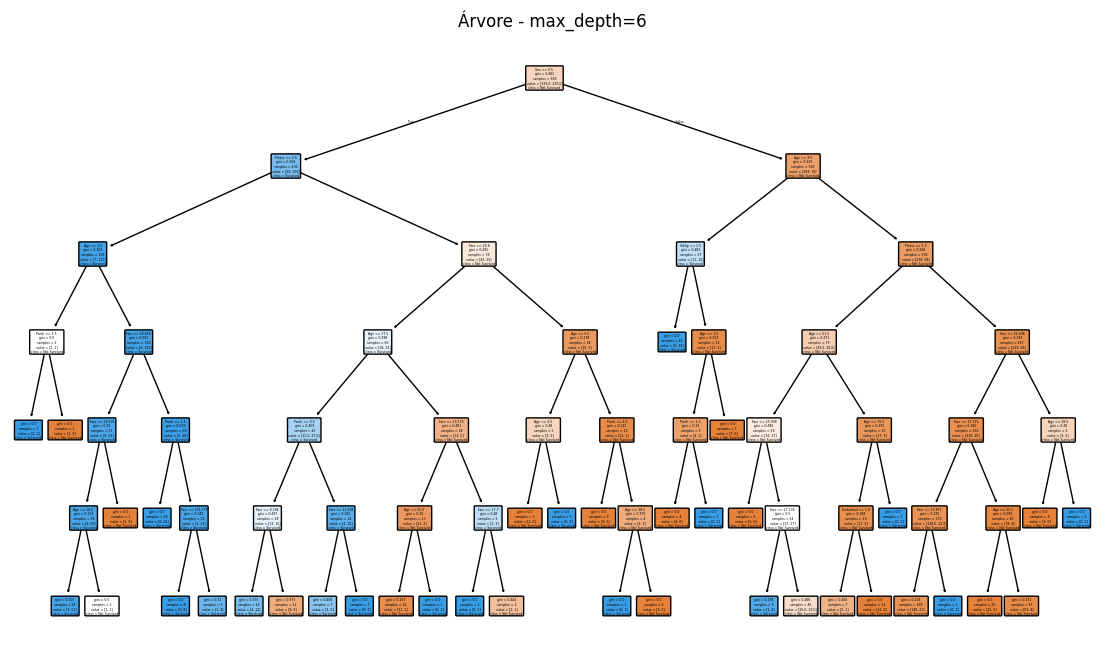

In [ ]:
def plot_decision_tree(model, feature_names, title):
    plt.figure(figsize=(14, 8))
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=["Not Survived", "Survived"],
        filled=True,
        rounded=True
    )
    plt.title(title)
    plt.show()

plot_decision_tree(tree_default, X.columns, "Árvore - Default")
for d in depths:
    plot_decision_tree(models[d], X.columns, f"Árvore - max_depth={d}")

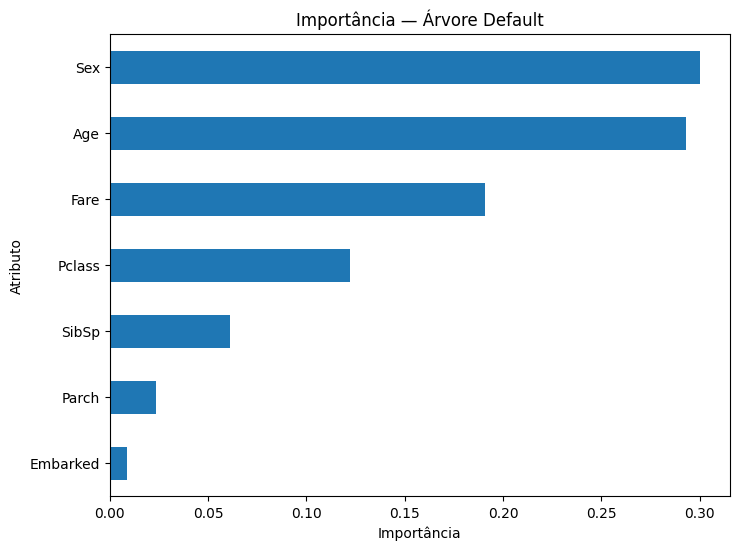

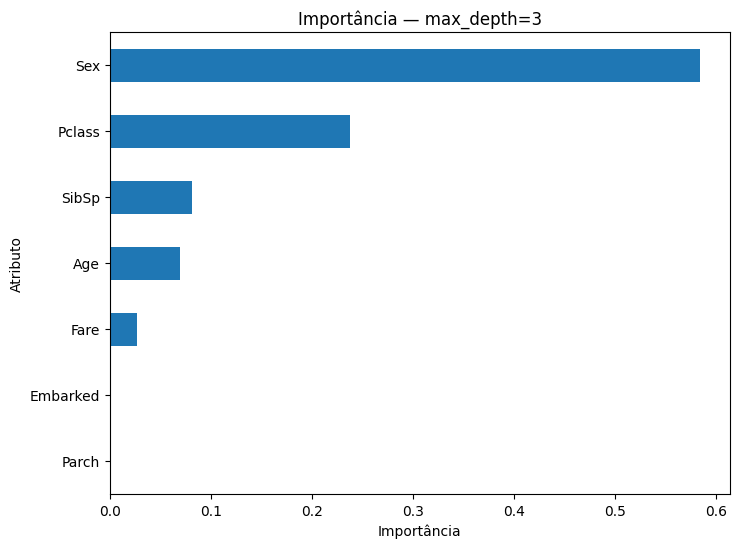

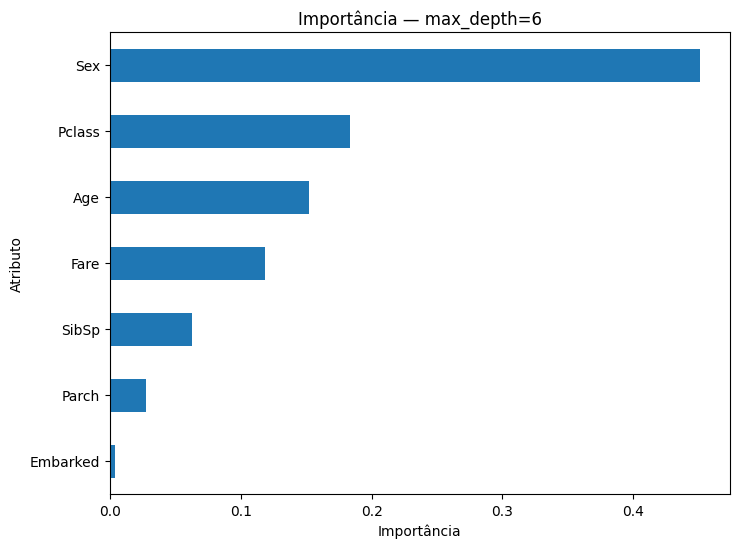

In [28]:
def plot_feature_importances(model, feature_names, title):
    importances = pd.Series(model.feature_importances_, index=feature_names).sort_values()
    plt.figure(figsize=(8, 6))
    importances.plot(kind="barh")
    plt.title(title)
    plt.xlabel("Importância")
    plt.ylabel("Atributo")
    plt.show()

plot_feature_importances(tree_default, X.columns, "Importância — Árvore Default")
for d in depths:
    plot_feature_importances(models[d], X.columns, f"Importância — max_depth={d}")